# Try fitting the data with RandomForestRegressors

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [10]:
data_filename = '/Users/brad/Desktop/CS6620/Project/Data/dataVersion1.npy' 
truth_filename = '/Users/brad/Desktop/CS6620/Project/Data/truthVersion1.npy' 
x = np.load(data_filename)
y = np.load(truth_filename)
print('Before split')
print(x.shape)
print(y.shape)
train_length = int(x.shape[0] * 0.85)
x_train = x[0 : train_length].reshape(-1, 34)
y_train = y[0 : train_length].reshape(-1, 1)
x_test = x[train_length : ].reshape(-1, 34)
y_test = y[train_length : ].reshape(-1, 1)
print('After split and reshape')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Before split
(5259, 34)
(5259,)
After split and reshape
(4470, 34)
(4470, 1)
(789, 34)
(789, 1)


In [12]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(x_train, y_train)

<ipython-input-12-932c021c312b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=0)

In [15]:
# Training data r^2 value 
y_train_pred = regressor.predict(x_train)
r2_score(y_train, y_train_pred)

0.9681581456265491

In [14]:
# testing data r^2 value 
y_test_pred = regressor.predict(x_test)
r2_score(y_test, y_test_pred)

0.5456355319901851

In [18]:
def computeAverageError(pred, y):
    err = []
    for i in range(len(pred)):
        err.append(abs((y[i] - pred[i])/y[i]))

    return sum(err)/ len(err)

In [19]:
computeAverageError(y_test_pred, y_test)

array([1.20475334])

In [20]:
computeAverageError(y_train_pred, y_train)

array([0.36931521])

# Support Vector Regression 

In [11]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

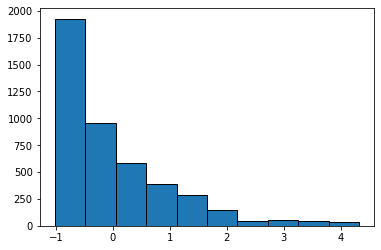

In [12]:
plt.figure()
plt.hist(y_train, edgecolor='black')
plt.show()

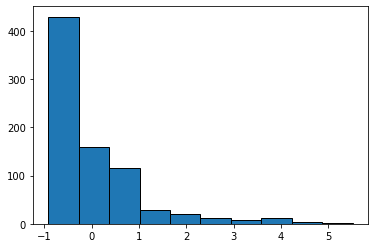

In [13]:
plt.figure()
plt.hist(y_test, edgecolor='black')
plt.show()

### Before transform, data has range (0, 1) after transform, from from (-1,6) 


In [15]:
# Reshape Y 
print('Before reshaping: ')
print(y_train.shape)
print(y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()
print('After reshaping: ')
print(y_train.shape)
print(y_test.shape)

Before reshaping: 
(4470, 1)
(789, 1)
After reshaping: 
(4470,)
(789,)


In [16]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

SVR()

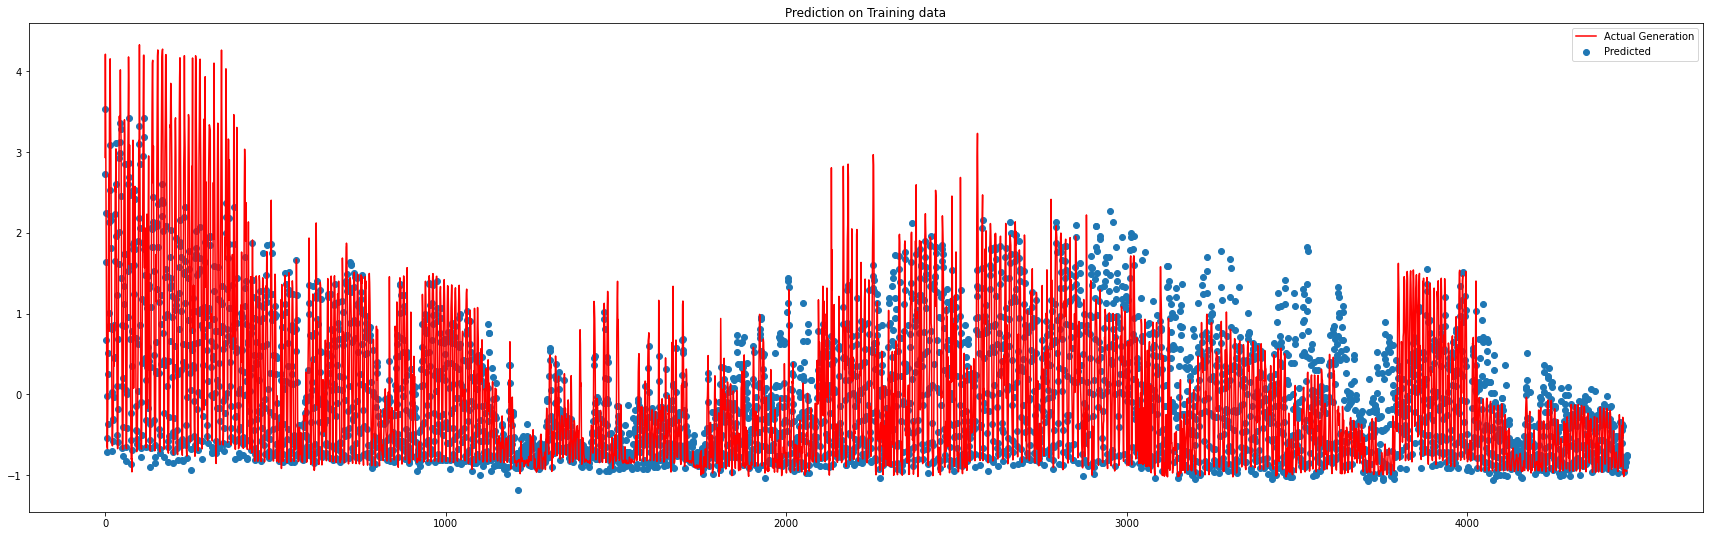

In [31]:
y_train_pred = regressor.predict(x_train)
plt.figure(figsize=(30,9))
plt.plot(y_train, 'r')
plt.scatter(x=np.arange(y_train_pred.shape[0]), y=y_train_pred)
plt.legend(['Actual Generation', 'Predicted'])
plt.title("Prediction on Training data")
plt.show()

In [26]:
r2_score(y_train, y_train_pred)

0.7248905465626614

In [17]:
y_pred = regressor.predict(x_test)

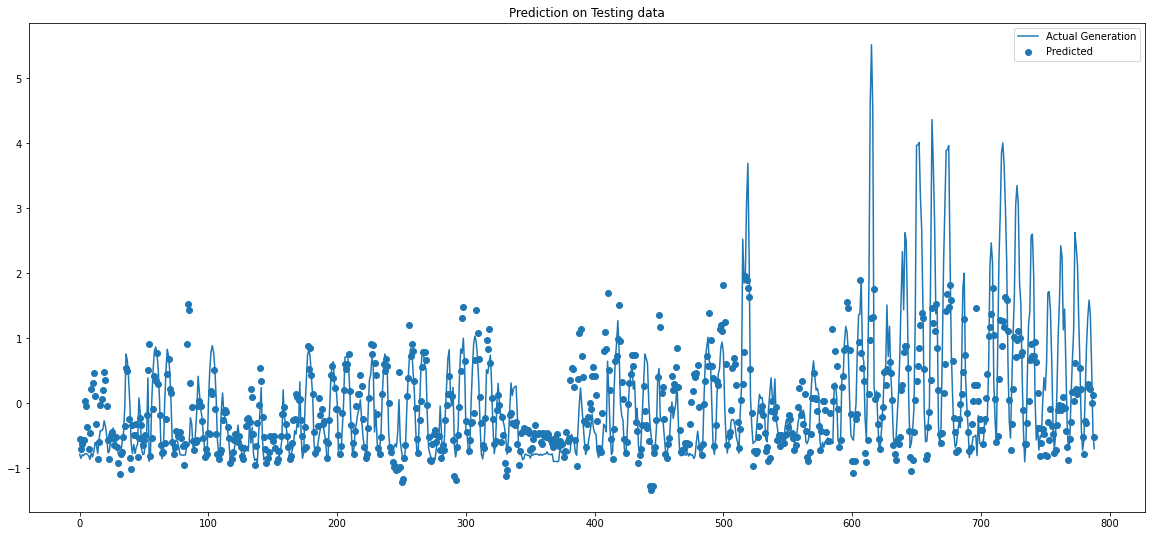

In [29]:
plt.figure(figsize=(20,9))
plt.plot(y_test)
plt.scatter(x=np.arange(y_pred.shape[0]), y=y_pred)
plt.legend(['Actual Generation', 'Predicted'])
plt.title("Prediction on Testing data")
plt.show()

In [21]:
r2_score(y_test, y_pred)

0.45496361886467995

In [32]:
r2_score(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred))

0.4549636188646802